# Gibbs Ensemble

In this example, we use the Gibbs ensemble to study the co-existence of gaseous and liquid phases in a Lennard-Jones particle system.

## How to run

The Gibbs ensemble requires that Faunus is compiled with MPI support and _exactly two_ processes must be given with e.g. `mpirun -np 2`.
- If the starting conditions for each cell are identical, use `--nopfx` and a single `input.json` file.
- If the input differs, e.g. different initial volumes or number of particles, create two input files, prefixes with `mpi0.` and `mpi1.` and skip the `--nopfx` flag.

## Refence system

This current setup is for a Lennard-Jones system as shown in Table 1 of [doi:10/cvzgw9](https://dx.doi.org/doi:10/cvzgw9). At $T^*=1.25$ we have gas-liquid coexistence at the reduced densities $\rho^*(g)=0.148$ and $\rho^*(l)=0.526$.
These reference values are shown with green, dashed lines on the last row of plots below.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!yason.py gibbs-ensemble.yml > input.json
#!mpirun -np 2 ./faunus --nopfx -i input.json --nobar --verbosity 5
print('done.')

done.


Initial volume           = 2000.0
mean total volume        = 2000.0 ± 7.1E-08
mean total num particles = 600.0 ± 0.0E+00


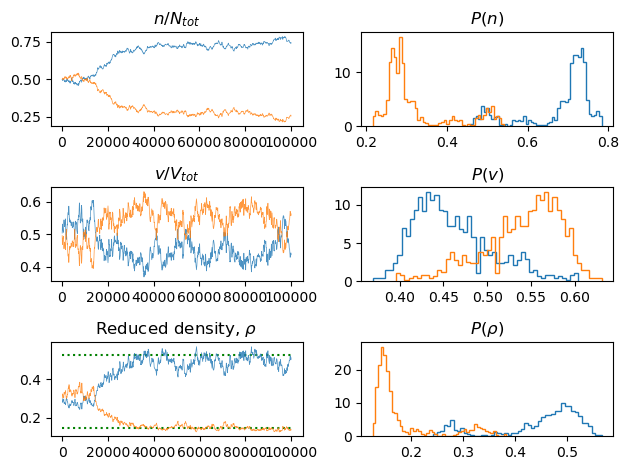

In [3]:
steps, V1 = np.loadtxt('mpi0.volume.dat.gz', usecols=[0,1], unpack=True)
V2 = np.loadtxt('mpi1.volume.dat.gz', usecols=[1])
n1 = np.loadtxt('mpi0.N.dat.gz', usecols=[1])
n2 = np.loadtxt('mpi1.N.dat.gz', usecols=[1])
V = V1 + V2
N = n1 + n2
rho1 = n1 / V1
rho2 = n2 / V2

fig, ax = plt.subplots(nrows=3, ncols=2)

# Number of particles
ax[0][0].set_title(r'$n/N_{tot}$')
ax[0][0].plot(steps, n1 / N, alpha=0.8, lw=0.5)
ax[0][0].plot(steps, n2 / N, alpha=0.8, lw=0.5)
ax[0][1].hist(n1 / N, bins=50, density=True, histtype='step')
ax[0][1].hist(n2 / N, bins=50, density=True, histtype='step')
ax[0][1].set_title(r'$P(n)$')

# Volumes
ax[1,0].set_title(r'$v/V_{tot}$')
ax[1,0].plot(steps, V1 / V, alpha=0.8, lw=0.5)
ax[1,0].plot(steps, V2 / V, alpha=0.8, lw=0.5)
ax[1,1].hist(V1 / V, bins=50, density=True, histtype='step')
ax[1,1].hist(V2 / V, bins=50, density=True, histtype='step')
ax[1,1].set_title(r'$P(v)$')

# Densities incl. reference values from Table 1 in doi:10/cvzgw9
ax[2,0].set_title(r'Reduced density, $\rho$')
ax[2,0].hlines(y=0.148, xmin=0, xmax=steps[-1], color='g', alpha=1, linestyle=':')
ax[2,0].hlines(y=0.526, xmin=0, xmax=steps[-1], color='g', alpha=1, linestyle=':')
ax[2,0].plot(steps, rho1, alpha=0.8, lw=0.5)
ax[2,0].plot(steps, rho2, alpha=0.8, lw=0.5)
ax[2,1].hist(rho1, bins=50, density=True, stacked=True, histtype='step')
ax[2,1].hist(rho2, bins=50, density=True, stacked=True, histtype='step')
ax[2,1].set_title(r'$P(\rho)$')

plt.tight_layout()

box_length = 9.999999999999998 # initial box lengths
print('Initial volume           = {:.1f}'.format(box_length**3 * 2))
print('mean total volume        = {:.1f} ± {:.1E}'.format(V.mean(), V.std()))
print('mean total num particles = {:.1f} ± {:.1E}'.format(N.mean(), N.std()))